# Decision tree using the Universal Bank dataset



# Building a decision tree model on Universal Bankdataset <a class="anchor" id ="steps"></a>
# steps
[Data preprocessing](#step1)<br>
[Build a decision tree model](#step2)<br>
[Evaluate and interprete the tree model](#step3)<br>

### Step1.Data Preprocessing<a class="anchor" id="step1"></a>

[go_back_up](#steps)

In [1]:
import pandas as pd
bank_data = pd.read_csv('UniversalBank.csv')
bank_data.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0


In [3]:
bank_data.shape

(5000, 12)

In [6]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Securities Account  5000 non-null   int64  
 8   CD Account          5000 non-null   int64  
 9   Online              5000 non-null   int64  
 10  CreditCard          5000 non-null   int64  
 11  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


#### Based on the sample data,  how many customers didn't accept the loan offer?

To answer this question, we need to count the number of instances who didn't accept the loan offer, which is indicated by the target variable **Personal Loan**. We use **value_counts()** method.


In [10]:
bank_data['Personal Loan'].value_counts()

Personal Loan
0    4520
1     480
Name: count, dtype: int64

#### In the following lines, we perform label encoding and partition the data into training set and test set.
1. first, perform label encoding for predictors



In [30]:
X = pd.get_dummies(bank_data.iloc[:, 0:11],drop_first=True)
X.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,1,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1


In [34]:
X.shape

(5000, 11)

2. Then, perform label encoding for the target variable.


In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(bank_data['Personal Loan'].values)
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

 3. As always, we split it into a training and a test part. Please use **25%** of the data as test set (using random_state = 0).


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train.shape

(3750, 11)

### Step 2: Build a Decision Tree Model<a class="anchor" id="step2"></a>
Now we build a model using the default setting of fully developing the tree (growing the tree until all leaves are pure). We fix the **random_state = 0** in the tree.

[go_back_up](#steps)

In [36]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = 0)

In [38]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [40]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))

Accuracy on training set: 1.000


### Step 3: Evaluate and interpret the Tree<a class="anchor" id="step3"></a>

#### After applying your decision tree model to the test set, what is the model accuracy?

To answer this question, you need to apply the decision tree model on the test set using **.predict** and use **accuracy_score()** to estimate the model accuracy.

[go_back_up](#steps)

In [42]:
y_pred = tree.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on test set: 0.979


#### Based on the obtained confusion matrix on the test set, how many customers are correctly classified as "Accept the loan offer"?

#### Based on the obtained confusion matrix on the test set, what is the true positive rate? Note: Please look at the labels in outputed confusion matrix and identify TP, TN, FP, and FN

To answer these two questions, we need to take a look at the confusion matrix.



In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1125   17]
 [   9   99]]


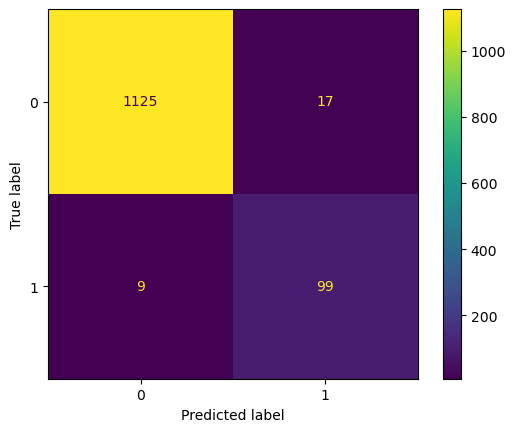

In [48]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=tree.classes_)
disp.plot()
plt.show()

In [51]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(accuracy_score(y_pred, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.979


#### Based on the feature_importance_ attribute, which of the following  is the most important feature in predicting the target variable?

To answer this question, you need to get the importance measure for each variable. The importance value for predictors have been save in **feature_importances_** attribute.



In [53]:
# variable importance in decision tree
importance = pd.DataFrame(tree.feature_importances_, index = X.columns, columns = ["Importance"]).sort_values(by= "Importance", ascending= False)
importance

,Importance
Income,0.446554
Education,0.284416
Family,0.128738
CCAvg,0.081587
Age,0.017156
CD Account,0.015310
Experience,0.011895
Mortgage,0.006466
Online,0.005471
CreditCard,0.002407


#### In your decision tree model, which feature creates the first split of the data?

To answer this question, you can either use importance values, or visualize the decision tree and see which variable is at the top of the tree (you will need the tree visualization to answer the next question as well).



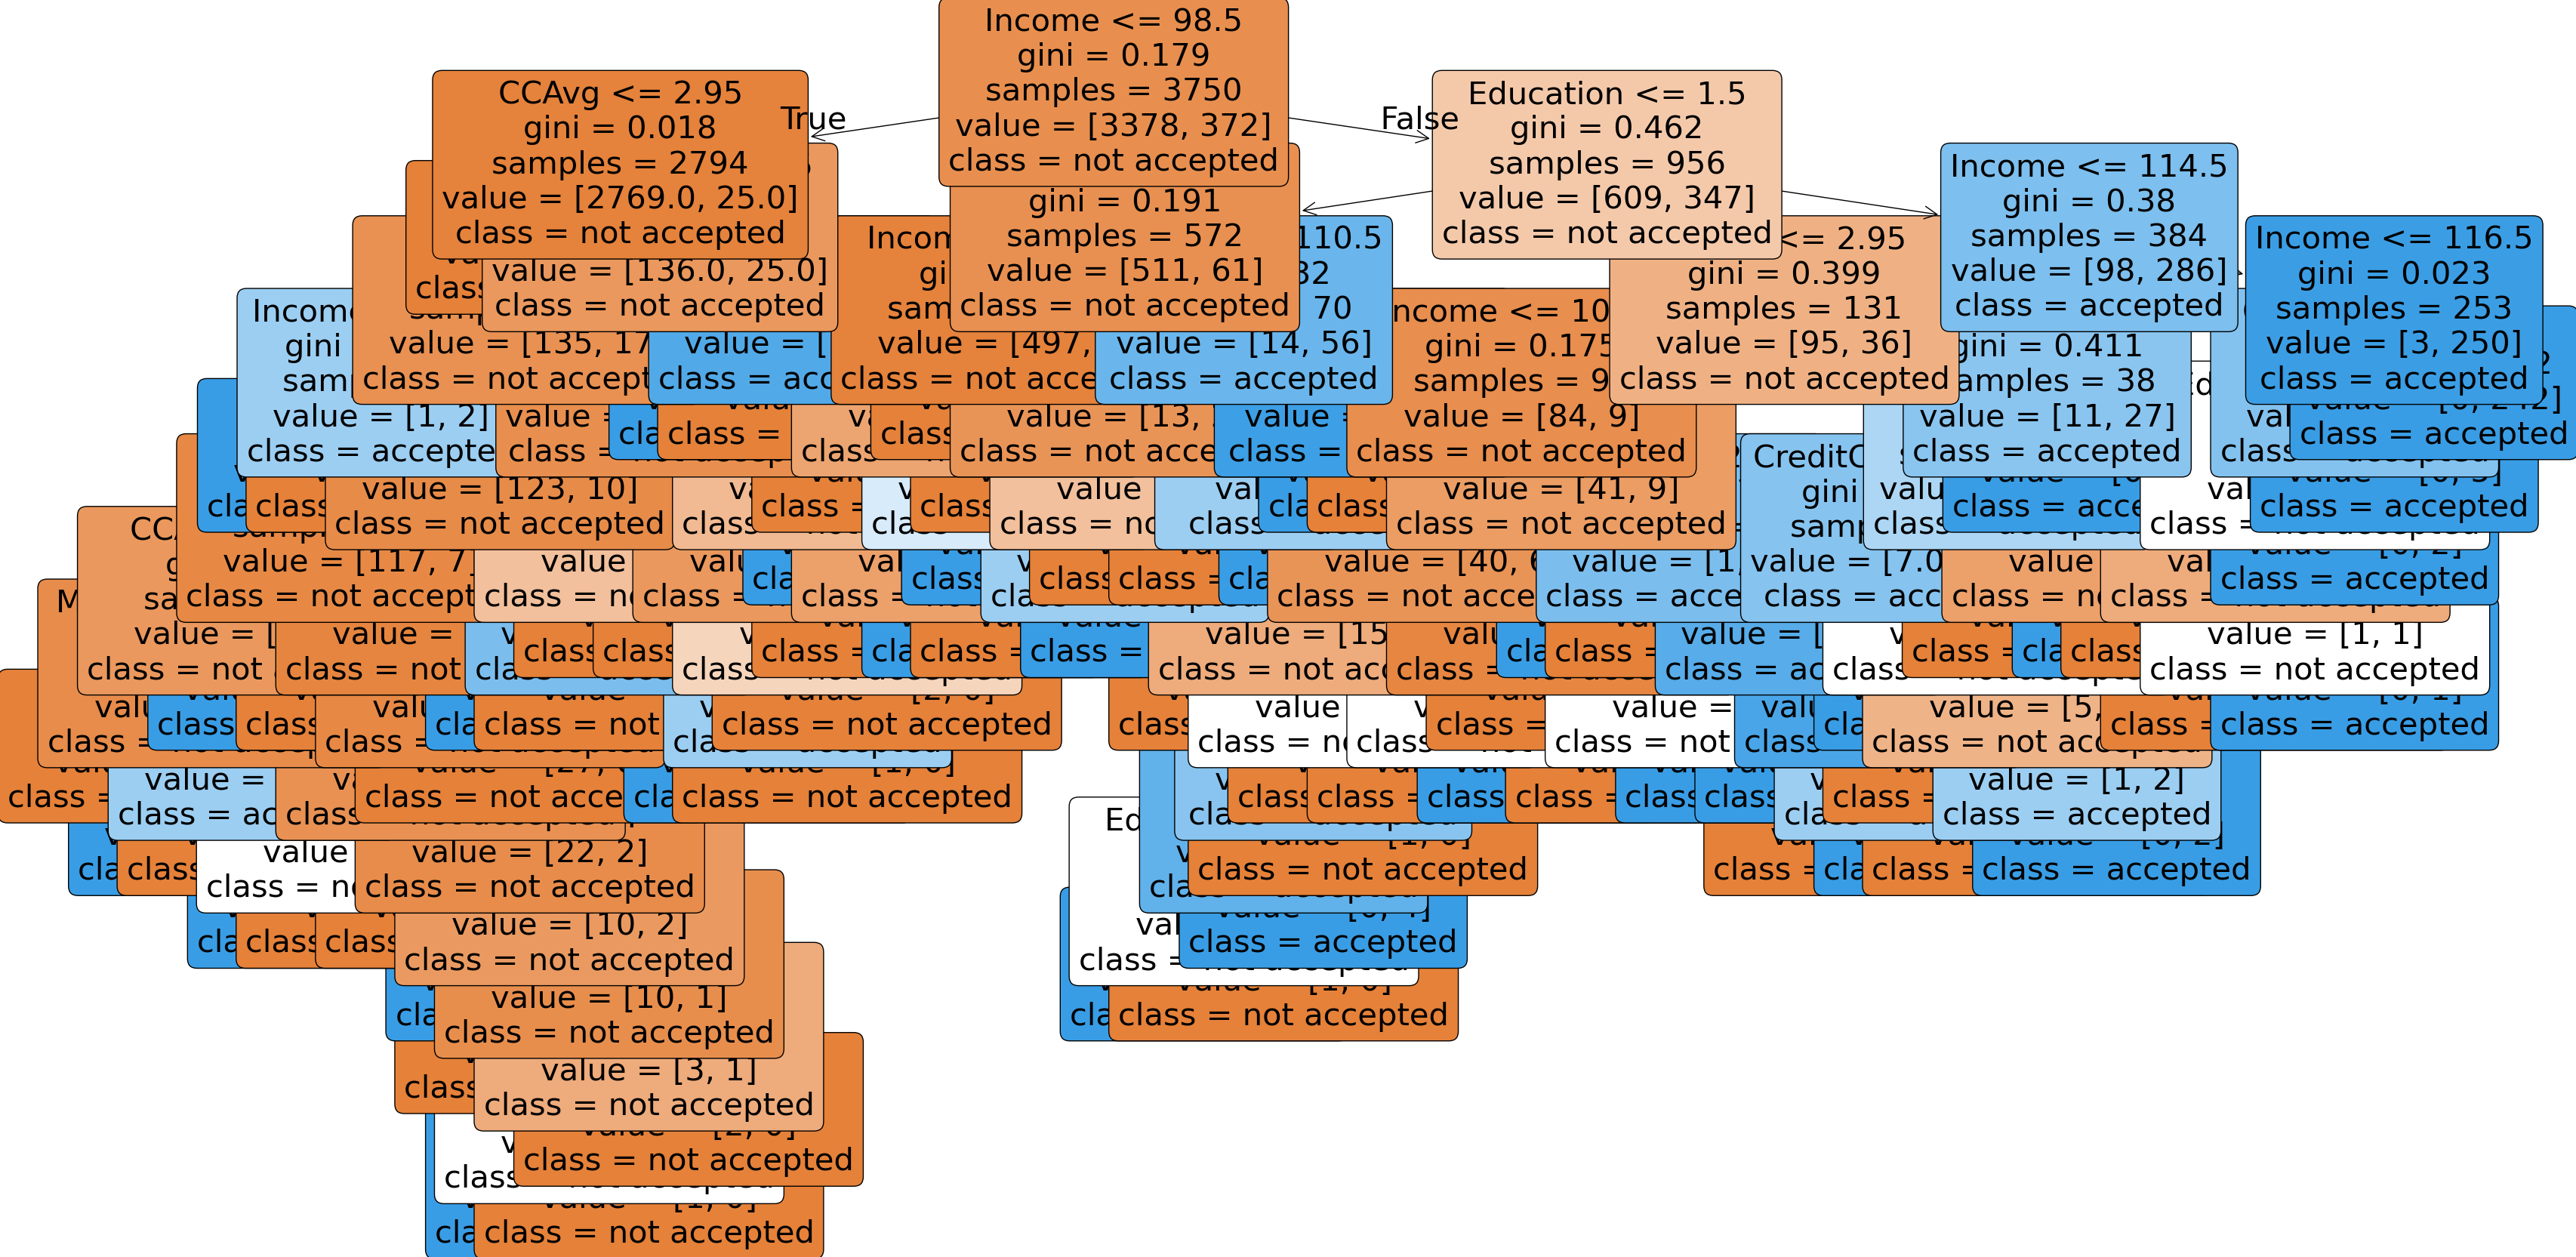

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(40,20))
display_tree = plot_tree(tree, 
              feature_names=X.columns.tolist(), 
              class_names=["not accepted", "accepted"], 
              filled=True, 
              rounded=True,
              fontsize=30)

#### At the first split of the tree (the top node), how many instances are classified as "not accept"?

To answer this question, you need to look at the information in the first node in the tree visualization.

#### Based on the ROC curve, what is the area under the curve on the test set?

To answer this question, you need to create a roc curve.



In [57]:
#keep probabilities for the positive outcome only
tree.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [59]:
y_pred_proba = tree.predict_proba(X_test)[:,1]

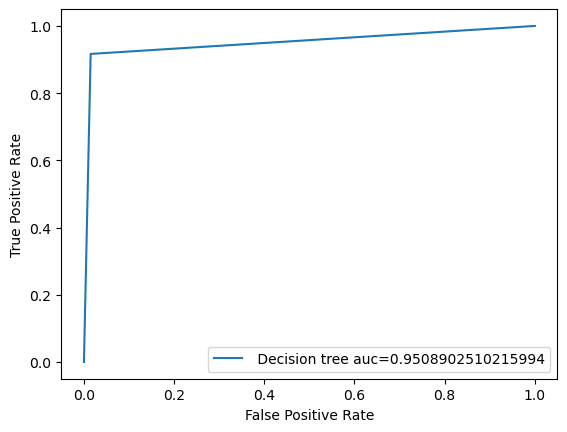

In [61]:
# create roc curve and calculate auc value
from sklearn import metrics
from matplotlib import pyplot
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
pyplot.plot(fpr,tpr,label=" Decision tree auc="+str(auc))
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
plt.show()